In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%reload_ext autoreload

In [31]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io as io
import numpy
import my_types, homography, rectification, utils

In [32]:
DATA = Path("data")

# Pick Correspondences

In [33]:
im1 = my_types.to_img_arr("data/doll1.jpg")
im2 = my_types.to_img_arr("data/doll2.jpg")
im3 = my_types.to_img_arr("data/doll3.jpg")

In [34]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"

if PICK_NEW:
    %matplotlib tk
    # im3_name = DATA / "doll3.jpg"
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

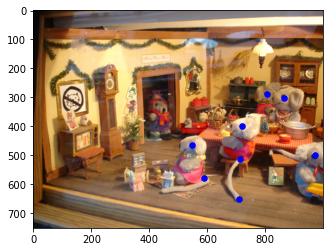

In [35]:
utils.plot_pts(im1, im1_pts)

In [41]:
import cv2
T, *_ = cv2.findHomography(im1_pts, im2_pts)
T

array([[ 1.48898902e+00,  5.58042103e-03, -7.22616885e+02],
       [ 7.82864297e-02,  1.41988665e+00, -1.13865899e+02],
       [ 4.46616118e-04,  1.55935124e-04,  1.00000000e+00]])

In [42]:
def homo_matrix(im1_pts: np.ndarray, im2_pts: np.ndarray):
    """Returns a homographic transformation matrix from ptsA to ptsB"""
    # assert_points(im1_pts, ratio=False)
    # assert_points(im2_pts, ratio=False)
    assert len(im1_pts) == len(im2_pts)

    num_pts = len(im1_pts)

    A = []
    B = []
    for (x1, y1), (x2, y2) in zip(im1_pts, im2_pts):
        # row1 = [x1, y1, 1, 0, 0, 0, -x1 * x2, -y1 * x2]
        # row2 = [0, 0, 0, x1, y1, 1, -x1 * y2, -y1 * y2]
        row1 = [-x1, -y1, -1, 0, 0, 0, x1 * x2, y1 * x2]
        row2 = [0, 0, 0, -x1, -y1, -1, x1 * y2, y1 * y2]
        A.append(row1)
        A.append(row2)
        B.extend((x2, y2))

    A = np.array(A)
    B = np.array(B)

    params, *_ = np.linalg.lstsq(A, B, rcond=None)
    H = np.reshape(np.hstack((params, [1])), (3, 3))
    #     a, b, c, d, e, f, g, h = params
    #     H = np.array([[a, b, c], [d, e, f], [g, h, 1]])
    return H

# find homographic transformation matrix
H = homo_matrix(im1_pts, im2_pts)
H

array([[-1.16973903e+00,  4.41763292e-02,  5.34308084e+02],
       [ 6.91450044e-03, -1.09612772e+00,  1.11329462e+01],
       [-2.12107232e-04,  1.93414403e-05,  1.00000000e+00]])

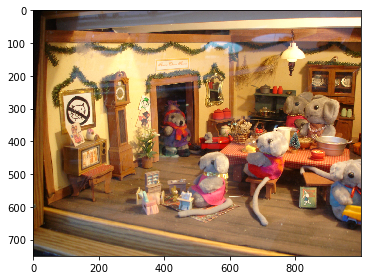

In [43]:
io.imshow(im1)

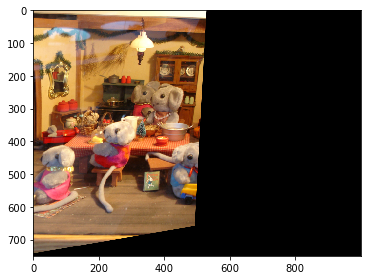

In [46]:
import skimage as sk
import cv2
T, *_ = cv2.findHomography(im1_pts, im2_pts)
warp1 = sk.transform.warp(im1, np.linalg.inv(T))
io.imshow(warp1)

=====src=====
(750, 1000, 3)
0 0
749 999
====target====
(1159, 1503, 3)
0 0
964 1252
=====interpolate=====
[  0   0   0 ... 772 772 772]
[   0    2    4 ... 1213 1214 1215]


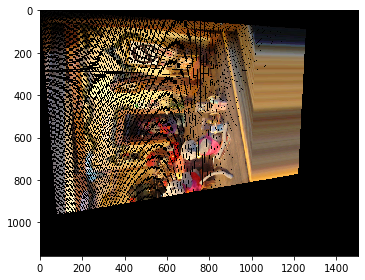

In [537]:
warp1 = homography.forward_warp(im1, T)
io.imshow(warp1)

====target====
(966, 1253, 3)
1 1
964 1251
=====src=====
(750, 1000, 3)
396 43
1087 714
=====interpolate=====


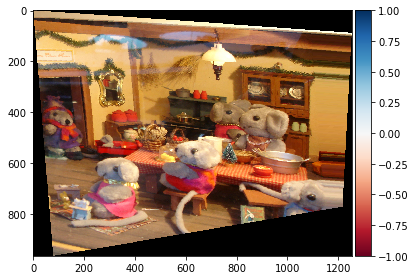

In [538]:
warp1 = homography.inverse_warp(im1, T)
io.imshow(warp1)

In [ ]:
warp1 = homography.inverse_warp(im1, H)
io.imshow(warp1)

box = array([[   3,   41],
       [   0, 1100],
       [ 686, 1078],
       [ 837,    0]])


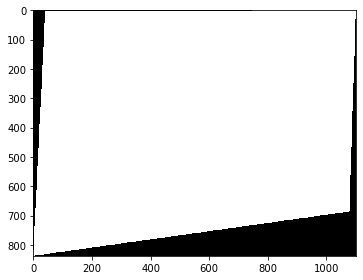

In [517]:
io.imshow(homography.inverse_mask(im1, T))